In [175]:
#1. Set up libraries
#Import libraries
import pandas as pd
import re
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', -1)

Research question - Compare the the activity and performance of younger students in a stem related subject (Earth Science) across the 5 Boroughs.  I decided to look at the younger students of the dataset to get some insights as to whether or not Stem related subjects are being instroduced early in the academic life of a student, hoping that the dataset will reveal how ambitious this initaitive is by determining how young students are entered for some subjects and how many students in any given year or Borough.

In [176]:
#2. Upload
#Read csv file
#Viewing the data - 212,331 rows, 15 columns
df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

In [177]:
#3. Exploring original dataset
df.shape

(212331, 15)

In [178]:
df.head(3)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na


In [179]:
df.tail(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [180]:
#Explore random sample of 5 of original dataset
df.sample(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
204963,31R455,Tottenville High School,High school,Integrated Algebra,2016,3,s,s,s,s,s,s,s,na,na
178323,17K382,Academy for College Preparation and Career Exp...,Secondary School,U.S. History and Government,2016,75,63.3,34,45.3,41,54.7,11,14.7,na,na


In [181]:
#Explore column information
df.columns

Index(['School DBN',
       'School Name',
       'School Level',
       'Regents Exam',
       'Year',
       'Total Tested',
       'Mean Score',
       'Number Scoring Below 65',
       'Percent Scoring Below 65',
       'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above',
       'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [182]:
#Explore list of subjects/ Regents exam
df[['Regents Exam']].value_counts()

Regents Exam                   
Common Core Algebra                29254
Living Environment                 25539
U.S. History and Government        20426
Common Core English                19878
Global History and Geography       19192
Physical Settings/Earth Science    15971
Common Core Geometry               15267
Physical Settings/Chemistry        11670
English                            11091
Integrated Algebra                 11022
Algebra2/Trigonometry              10788
Geometry                            8509
Common Core Algebra2                7915
Physical Settings/Physics           5799
dtype: int64

In [183]:
#Explore List/Count of all school levels in dataset
df["School Level"].value_counts()

High school                        151160
Secondary School                    30252
Junior High-Intermediate-Middle     15742
K-12 all grades                      8294
K-8                                  6858
Elementary                             25
Name: School Level, dtype: int64

In [184]:
df["School Name"].nunique()

1012

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [186]:
#4. Cleaning of DATA
#Remove all record/ row of data that has mean score of 's'
df = df.loc[df["Mean Score"]!='s']

In [187]:
#shows that 75,000 rows of data removed (additional col - Borough)
df.shape

(137109, 15)

In [188]:
#5. Transformation - datatype conversion and string formatting, subsetting of dataset
# Converting columns Mean Score and Number Scoring 80 or Above to numeric data type 
df[["Mean Score", "Number Scoring 80 or Above"]]=df[["Mean Score","Number Scoring 80 or Above"]].apply(pd.to_numeric)

In [189]:
#Show that col=Mean score and col=Number scoring above 80 datatype now converted to numeric
df.dtypes

School DBN                      object
School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65         object
Percent Scoring Below 65        object
Number Scoring 65 or Above      object
Percent Scoring 65 or Above     object
Number Scoring 80 or Above       int64
Percent Scoring 80 or Above     object
Number Scoring CR               object
Percent Scoring CR              object
dtype: object

In [190]:
#copy School DBN column creating new column for Boroughs
#Remove the numbers before and after the Borough Letter - K,M,Q,R,X
df["Boroughs"]=df["School DBN"]
df["Boroughs"] = df.Boroughs.str.replace('\d+', '',regex=True )

In [191]:
#Create subset of dataset of relevant columns
SchoolCol = df[["School DBN","Boroughs","School Name", "School Level","Regents Exam", "Year", "Total Tested", "Mean Score", "Number Scoring 80 or Above"]]
SchoolCol.sample(2)

,School DBN,Boroughs,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring 80 or Above
152246,04M495,M,Park East High School,High school,Physical Settings/Earth Science,2017,28,64.7,4
116285,10X565,X,High School for Energy and Technology,High school,Integrated Algebra,2015,36,58.8,0


In [192]:
#Create subset of dataset of relevant columns
Final_df = df[["School DBN","Boroughs", "School Level","Regents Exam", "Year", "Total Tested", "Number Scoring 80 or Above"]]
Final_df.sample(2)

,School DBN,Boroughs,School Level,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
74874,12X321,X,High school,Common Core English,2017,31,8
33684,12X248,X,High school,Common Core English,2015,53,18


In [193]:
#Check new shape (rows/columns) of adjusted dataset
Final_df.shape

(137109, 7)

In [194]:
#Sample Selection - selecting only Physical Settings/Earth Science and K8 school level
ExamEarthSci = Final_df[(Final_df["Regents Exam"]=="Physical Settings/Earth Science") & (SchoolCol["School Level"]=="K-8")]
ExamEarthSci.groupby(['Boroughs', 'Year']).sum()

Total Tested  \
Boroughs Year                 
K        2015           564   
         2016           559   
         2017           651   
M        2015           528   
         2016           534   
         2017           469   
Q        2015          1425   
         2016          1310   
         2017          1708   
X        2015           545   
         2016           457   
         2017           301   

               Number Scoring 80 or Above  
Boroughs Year                              
K        2015                         362  
         2016                         413  
         2017                         455  
M        2015                         198  
         2016                         288  
         2017                         223  
Q        2015                        1075  
         2016                        1025  
         2017                        1062  
X        2015                         232  
         2016                         290  
         2017                          95

Text(0, 0.5, 'Frequency')

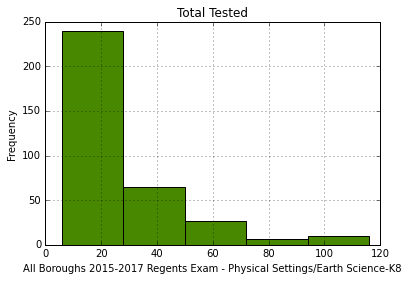

In [195]:
#6. Data Visualization
#HISTOGRAM - showing Total Tested - Earth Science, School Level-K8 
ExamEarthSci.hist(column='Total Tested', bins=5, color='#478800')
plt.xlabel('All Boroughs 2015-2017 Regents Exam - Physical Settings/Earth Science-K8')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

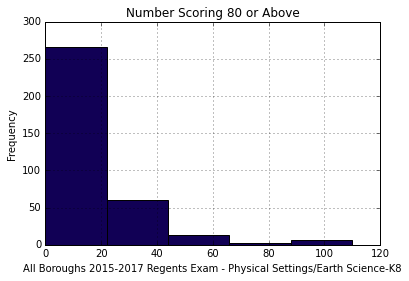

In [196]:
#HISTOGRAM - showing count of K8 students scoring 80 and above on Earth Science
ExamEarthSci.hist(column='Number Scoring 80 or Above', bins=5, color='#110055')
plt.xlabel('All Boroughs 2015-2017 Regents Exam - Physical Settings/Earth Science-K8')
plt.ylabel('Frequency')

array([[<AxesSubplot:title={'center':'Total Tested'}>,
        <AxesSubplot:title={'center':'Number Scoring 80 or Above'}>]],
      dtype=object)

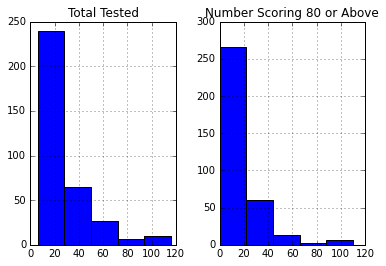

In [197]:
ExamEarthSci_plot2 = ExamEarthSci[["Total Tested", "Number Scoring 80 or Above"]]
ExamEarthSci_plot2.hist(bins=5)

In [198]:
ExamEarthSci.groupby(['Boroughs', 'Year']).max()

School DBN  \
Boroughs Year              
K        2015     84K702   
         2016     84K702   
         2017     84K702   
M        2015     02M126   
         2016     02M126   
         2017     02M126   
Q        2015     29Q208   
         2016     29Q208   
         2017     29Q208   
X        2015     84X255   
         2016     84X255   
         2017     84X255   

              School Level  \
Boroughs Year                
K        2015          K-8   
         2016          K-8   
         2017          K-8   
M        2015          K-8   
         2016          K-8   
         2017          K-8   
Q        2015          K-8   
         2016          K-8   
         2017          K-8   
X        2015          K-8   
         2016          K-8   
         2017          K-8   

                                  Regents Exam  \
Boroughs Year                                    
K        2015  Physical Settings/Earth Science   
         2016  Physical Settings/Earth Science   
         2017  Physical Settings/Earth Science   
M        2015  Physical Settings/Earth Science   
         2016  Physical Settings/Earth Science   
         2017  Physical Settings/Earth Science   
Q        2015  Physical Settings/Earth Science   
         2016  Physical Settings/Earth Science   
         2017  Physical Settings/Earth Science   
X        2015  Physical Settings/Earth Science   
         2016  Physical Settings/Earth Science   
         2017  Physical Settings/Earth Science   

               Total Tested  \
Boroughs Year                 
K        2015            29   
         2016            30   
         2017            30   
M        2015           116   
         2016           108   
         2017           103   
Q        2015           114   
         2016            97   
         2017           107   
X        2015            60   
         2016            47   
         2017            51   

               Number Scoring 80 or Above  
Boroughs Year                              
K        2015                          22  
         2016                          26  
         2017                          27  
M        2015                          43  
         2016                          58  
         2017                          49  
Q        2015                         110  
         2016                          90  
         2017                         101  
X        2015                          22  
         2016                          28  
         2017                          11

In [199]:
#ExamEarthSci.plot()
ExamEarthSci.groupby('Boroughs').max()

,School DBN,School Level,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
Boroughs,,,,,,
K,84K702,K-8,Physical Settings/Earth Science,2017,30,27
M,02M126,K-8,Physical Settings/Earth Science,2017,116,58
Q,29Q208,K-8,Physical Settings/Earth Science,2017,114,110
X,84X255,K-8,Physical Settings/Earth Science,2017,60,28


In [200]:
#ExamEarthSci.plot()
ExamEarthSci.groupby('Boroughs').min()

,School DBN,School Level,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
Boroughs,,,,,,
K,17K138,K-8,Physical Settings/Earth Science,2015,6,0
M,02M126,K-8,Physical Settings/Earth Science,2015,11,0
Q,24Q113,K-8,Physical Settings/Earth Science,2015,6,0
X,10X095,K-8,Physical Settings/Earth Science,2015,6,2


In [201]:
#ExamEarthSci.plot()
ExamEarthSci.groupby('Boroughs').mean()

,Year,Total Tested,Number Scoring 80 or Above
Boroughs,,,
K,2015.991228,15.561404,10.789474
M,2016.000000,54.678571,25.321429
Q,2016.041958,31.069930,22.111888
X,2015.841270,20.682540,9.793651


In [202]:
#ExamEarthSci.plot()
ExamEarthSci.groupby('Boroughs').sum()

,Year,Total Tested,Number Scoring 80 or Above
Boroughs,,,
K,229823,1774,1230
M,56448,1531,709
Q,288294,4443,3162
X,126998,1303,617


In [203]:
#ExamEarthSci.plot()
ExamEarthSci.groupby('Year').sum()

,Total Tested,Number Scoring 80 or Above
Year,,
2015,3062,1867
2016,2860,2016
2017,3129,1835


In [204]:
#Show descriptive stats/mean, max, min/ of cols Total_Tested/ Score above 80 - K8 students in Earth Science
ExamEarthSci_plot2.describe()

,Total Tested,Number Scoring 80 or Above
count,348.000000,348.000000
mean,26.008621,16.431034
std,21.870656,16.906195
min,6.000000,0.000000
25%,11.000000,6.750000
50%,19.000000,12.000000
75%,31.000000,21.000000
max,116.000000,110.000000


<AxesSubplot:ylabel='Frequency'>

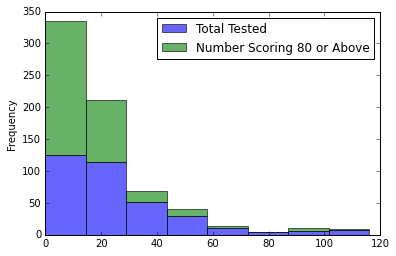

In [205]:
ExamEarthSci_plot2.plot.hist(stacked=True, bins=8,alpha=.6)

In [206]:
ExamEarthSci.groupby(['Boroughs']).sum()

,Year,Total Tested,Number Scoring 80 or Above
Boroughs,,,
K,229823,1774,1230
M,56448,1531,709
Q,288294,4443,3162
X,126998,1303,617


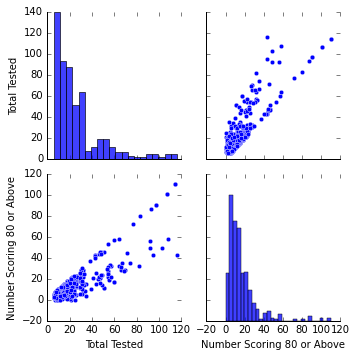

In [207]:
#ExamEarthSci_plot = df[["Boroughs","Total Tested","Number Scoring 80 or Above"]]
sns.pairplot(ExamEarthSci_plot2)

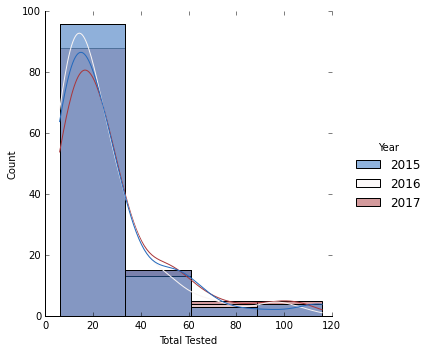

In [208]:
#ExamEarthSci = sns.load_dataset("ExamEarthSci")
#ExamEarthSci.head()
sns.displot(x ='Total Tested',kde=True,bins = 4 ,
hue = df['Year'] , palette = 'vlag', data=ExamEarthSci)

<AxesSubplot:xlabel='Total Tested', ylabel='Number Scoring 80 or Above'>

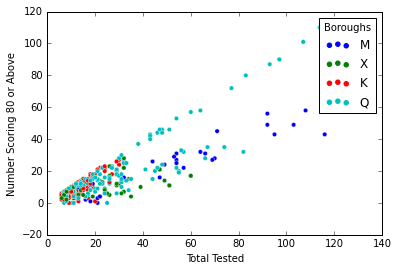

In [209]:
sns.scatterplot(x='Total Tested', y ='Number Scoring 80 or Above' ,
data = ExamEarthSci , hue = 'Boroughs')

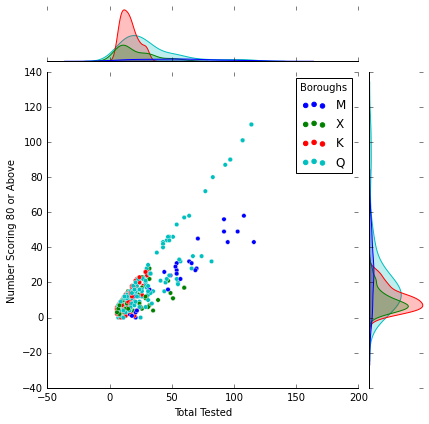

In [210]:
sns.jointplot(x = 'Total Tested', y = 'Number Scoring 80 or Above',
data = ExamEarthSci,hue = 'Boroughs')

<AxesSubplot:xlabel='Total Tested', ylabel='Number Scoring 80 or Above'>

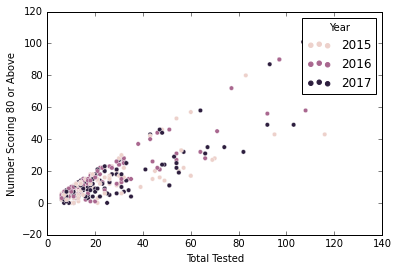

In [211]:
sns.scatterplot(x='Total Tested', y ='Number Scoring 80 or Above' ,
data = ExamEarthSci , hue = 'Year')

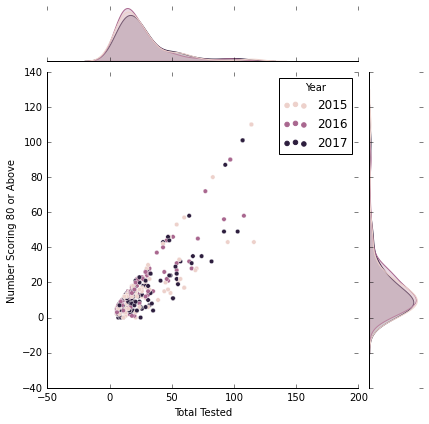

In [212]:
sns.jointplot(x = 'Total Tested', y = 'Number Scoring 80 or Above',
data = ExamEarthSci,hue = 'Year')

<AxesSubplot:xlabel='Year'>

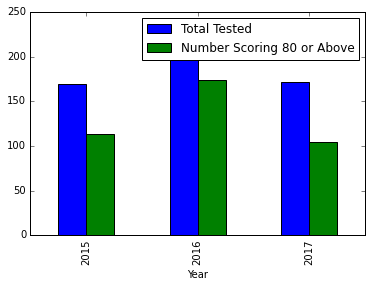

In [213]:
#Showing schools/ occurrences of 10 and under total students tested 2015-2017
ExamEarthSci_Borough = ExamEarthSci[(ExamEarthSci["Total Tested"]<=10)]
ExamEarthSci_Borough.groupby('Year').sum().plot(kind='bar')

<AxesSubplot:xlabel='Year'>

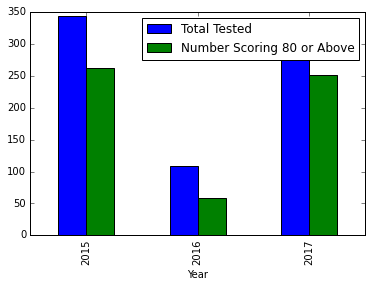

In [214]:
#Showing schools/ occurrences of 100+ total students tested 2015 to 2017
ExamEarthSci_Borough = ExamEarthSci[(ExamEarthSci["Total Tested"]>=100)]
ExamEarthSci_Borough.groupby('Year').sum().plot(kind='bar')

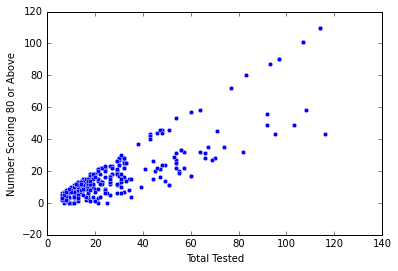

In [215]:
#Showing a positive correlation between Total Tested and score above 80
sns.scatterplot(data = ExamEarthSci_plot3, x = "Total Tested", y = "Number Scoring 80 or Above")
plt.show()

<AxesSubplot:title={'center':'Mean comparison across Boroughs'}, ylabel='Boroughs'>

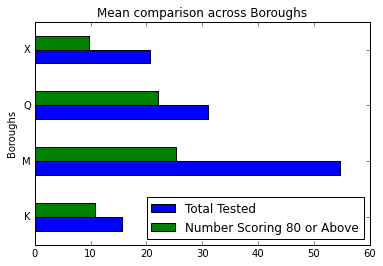

In [216]:
#Showing (mean) comparison of total tested/ Numbers scoring above 80 ACROSS the Boroughs
ExamEarthSci_plot3 = ExamEarthSci[["Boroughs","Total Tested", "Number Scoring 80 or Above"]]
ExamEarthSci_plot3.groupby('Boroughs').mean().plot(kind='barh', title="Mean comparison across Boroughs")

<AxesSubplot:ylabel='Boroughs'>

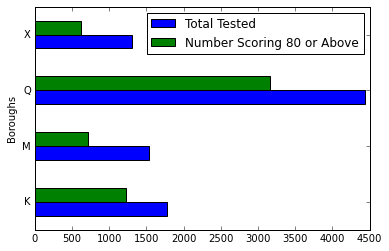

In [217]:
ExamEarthSci_plot3.groupby('Boroughs').sum().plot(kind='barh')

Text(0.5, 0, 'Max')

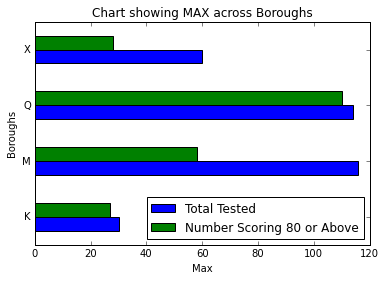

In [218]:
ExamEarthSci_plot3.groupby('Boroughs').max().plot(kind='barh', title='Chart showing MAX across Boroughs')
plt.xlabel("Max")

Text(0, 0.5, 'Sum')

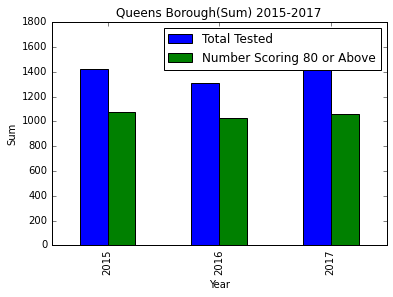

In [219]:
Queens_Borough = ExamEarthSci[(ExamEarthSci["Boroughs"]=="Q")]
Queens_Borough.groupby('Year').sum().plot(kind='bar',title='Queens Borough(Sum) 2015-2017')
plt.ylabel("Sum")

Text(0, 0.5, 'Sum')

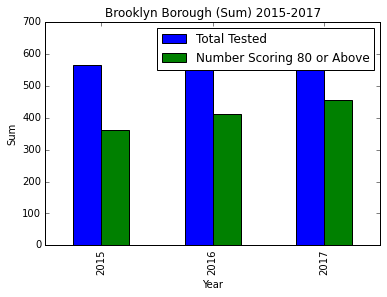

In [220]:
Brooklyn_Borough = ExamEarthSci[(ExamEarthSci["Boroughs"]=="K")]
Brooklyn_Borough.groupby('Year').sum().plot(kind='bar', title='Brooklyn Borough (Sum) 2015-2017')
plt.ylabel("Sum")